# IMPORT 

In [1]:
from pyspark import SparkContext, SparkConf, SQLContext
from pyspark.sql.functions import col
from pyspark.sql import SparkSession
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pymongo
from pymongo import  MongoClient

spark = SparkSession.\
        builder.\
        appName("Test_Projet").\
        master("spark://spark-master:7077").\
        config("spark.executor.memory", "3g").\
        getOrCreate()

22/11/17 09:58:43 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


# DATAFRAME 1

In [2]:
path = "./Data/quartier_paris.csv"

dataframe_1 = spark.read.option("delimiter", ";").option("header",True).csv(path)

In [3]:
dataframe_1.printSchema()

root
 |-- N_SQ_QU: string (nullable = true)
 |-- C_QU: string (nullable = true)
 |-- C_QUINSEE: string (nullable = true)
 |-- L_QU: string (nullable = true)
 |-- C_AR: string (nullable = true)
 |-- N_SQ_AR: string (nullable = true)
 |-- PERIMETRE: string (nullable = true)
 |-- SURFACE: string (nullable = true)
 |-- Geometry X Y: string (nullable = true)
 |-- Geometry: string (nullable = true)



In [4]:
data_1 = dataframe_1.drop('N_SQ_AR', 'Geometry', 'Geometry X Y')

In [5]:
data_1 = data_1.withColumnRenamed('N_SQ_QU','id_Quartier')\
        .withColumnRenamed('C_QU','Num_Quartier')\
        .withColumnRenamed('C_QUINSEE', 'Num_INSEE')\
        .withColumnRenamed('L_QU', 'Nom_Quartier')\
        .withColumnRenamed('C_AR', 'Num_Arrond')

data_1.printSchema()

root
 |-- id_Quartier: string (nullable = true)
 |-- Num_Quartier: string (nullable = true)
 |-- Num_INSEE: string (nullable = true)
 |-- Nom_Quartier: string (nullable = true)
 |-- Num_Arrond: string (nullable = true)
 |-- PERIMETRE: string (nullable = true)
 |-- SURFACE: string (nullable = true)



In [6]:
data_1 = data_1.withColumn('id_Quartier',col('id_Quartier').cast("integer")) \
                .withColumn('Num_Quartier',col('Num_Quartier').cast("integer"))\
                .withColumn('Num_INSEE',col('Num_INSEE').cast("integer")) \
                .withColumn('Num_Arrond',col('Num_Arrond').cast("integer")) 

In [7]:
data_1.show()

+-----------+------------+---------+--------------------+----------+-------------+----------------+
|id_Quartier|Num_Quartier|Num_INSEE|        Nom_Quartier|Num_Arrond|    PERIMETRE|         SURFACE|
+-----------+------------+---------+--------------------+----------+-------------+----------------+
|  750000008|           8|  7510204|      Bonne-Nouvelle|         2|2233.97603015| 281448.20657677|
|  750000015|          15|  7510403|             Arsenal|         4|2878.55965556| 487264.93707154|
|  750000016|          16|  7510404|          Notre-Dame|         4|3283.16337082| 378252.15367404|
|  750000020|          20|  7510504|            Sorbonne|         5|2892.94406823| 433197.79244055|
|  750000025|          25|  7510701|Saint-Thomas-d'Aquin|         7|3827.25335281| 826559.43678046|
|  750000050|          50|  7511302|                Gare|        13|7070.35056681|3044177.51486294|
|  750000042|          42|  7511102|      Saint-Ambroise|        11| 4052.5677372|  837992.9215673|


In [8]:
data_1.dtypes

[('id_Quartier', 'int'),
 ('Num_Quartier', 'int'),
 ('Num_INSEE', 'int'),
 ('Nom_Quartier', 'string'),
 ('Num_Arrond', 'int'),
 ('PERIMETRE', 'string'),
 ('SURFACE', 'string')]

# DATAFRAME 2

In [9]:
path = "./Data/logement-encadrement-des-loyers.csv"

dataframe_2 = spark.read.option("delimiter", ";").option("header",True).csv(path)

In [10]:
dataframe_2.printSchema()

root
 |-- Année: string (nullable = true)
 |-- Secteurs géographiques: string (nullable = true)
 |-- Numéro du quartier: string (nullable = true)
 |-- Nom du quartier: string (nullable = true)
 |-- Nombre de pièces principales: string (nullable = true)
 |-- Epoque de construction: string (nullable = true)
 |-- Type de location: string (nullable = true)
 |-- Loyers de référence: string (nullable = true)
 |-- Loyers de référence majorés: string (nullable = true)
 |-- Loyers de référence minorés: string (nullable = true)
 |-- Ville: string (nullable = true)
 |-- Numéro INSEE du quartier: string (nullable = true)
 |-- geo_shape: string (nullable = true)
 |-- geo_point_2d: string (nullable = true)



In [11]:
data_2 = dataframe_2.drop('Secteurs géographiques', 'geo_shape', 'geo_point_2d')

In [12]:
data_2 = data_2.withColumnRenamed('Numéro du quartier','Num_quart')\
                 .withColumnRenamed('Nom du quartier', 'Nom_quart')\
                 .withColumnRenamed('Nombre de pièces principales', 'Nb_pièces')\
                 .withColumnRenamed('Epoque de construction', 'Epoque')\
                 .withColumnRenamed('Type de location', 'Type')\
                 .withColumnRenamed('Loyers de référence', 'Loy_Ref')\
                 .withColumnRenamed('Loyers de référence majorés' , 'Loy_Max')\
                 .withColumnRenamed('Loyers de référence minorés', 'Loy_Min')\
                 .withColumnRenamed('Numéro INSEE du quartier','Num_INSEE')

In [13]:
data_2 = data_2.withColumn('Num_quart',col('Num_quart').cast("integer")) \
                .withColumn('Num_INSEE',col('Num_INSEE').cast("integer")) \
                .withColumn('Loy_Ref',col('Loy_Ref').cast("integer")) \
                .withColumn('Loy_Min',col('Loy_Min').cast("integer"))\
                .withColumn('Loy_Max',col('Loy_Max').cast("integer")) \
                .withColumn('Nb_pièces',col('Nb_pièces').cast("integer"))

In [14]:
data_2.show()

+-----+---------+-------------------+---------+----------+----------+-------+-------+-------+-----+---------+
|Année|Num_quart|          Nom_quart|Nb_pièces|    Epoque|      Type|Loy_Ref|Loy_Max|Loy_Min|Ville|Num_INSEE|
+-----+---------+-------------------+---------+----------+----------+-------+-------+-------+-----+---------+
| 2020|       33|      Saint-Georges|        2| 1946-1970|non meublé|     23|     28|     16|PARIS|  7510933|
| 2020|       28|       Gros-Caillou|        2| 1971-1990|    meublé|     30|     36|     21|PARIS|  7510728|
| 2020|       29|     Champs-Elysées|        1|Avant 1946|non meublé|     32|     39|     22|PARIS|  7510829|
| 2020|       34|   Chaussée-d'Antin|        3| 1946-1970|    meublé|     24|     29|     17|PARIS|  7510934|
| 2020|       35|Faubourg-Montmartre|        4| 1971-1990|non meublé|     21|     26|     15|PARIS|  7510935|
| 2020|       47|              Bercy|        3|Avant 1946|    meublé|     23|     27|     16|PARIS|  7511247|
| 2020|   

In [15]:
data_2.dtypes

[('Année', 'string'),
 ('Num_quart', 'int'),
 ('Nom_quart', 'string'),
 ('Nb_pièces', 'int'),
 ('Epoque', 'string'),
 ('Type', 'string'),
 ('Loy_Ref', 'int'),
 ('Loy_Max', 'int'),
 ('Loy_Min', 'int'),
 ('Ville', 'string'),
 ('Num_INSEE', 'int')]

### Calcul des moyennes

In [16]:
data_2.agg({"Loy_Ref": "mean"}).show(truncate=False)

+--------------+
|avg(Loy_Ref)  |
+--------------+
|25.38681640625|
+--------------+



In [17]:
data_2.agg({"Loy_Max": "mean"}).show(truncate=False)

+--------------+
|avg(Loy_Max)  |
+--------------+
|30.53427734375|
+--------------+



In [18]:
data_2.agg({"Loy_Min": "mean"}).show(truncate=False)

+--------------+
|avg(Loy_Min)  |
+--------------+
|17.62333984375|
+--------------+



In [19]:
data_2.agg({"Nb_pièces": "mean"}).show(truncate=False)

+--------------+
|avg(Nb_pièces)|
+--------------+
|2.5           |
+--------------+



### Corrélations

In [20]:
print(data_2.stat.corr('Nb_pièces', 'Loy_Ref'))

-0.5520241524421726


In [21]:
print(data_2.stat.corr('Nb_pièces', 'Loy_Min'))

-0.544205635916949


In [22]:
print(data_2.stat.corr('Nb_pièces', 'Loy_Max'))

-0.5522932951479006


In [23]:
print(data_2.stat.corr('Loy_Ref', 'Num_quart'))

-0.4090005833787298


In [24]:
print(data_2.stat.corr('Loy_Ref', 'Num_INSEE'))

-0.4090923891484998


### Filtres

In [25]:
data_2.filter(data_2.Loy_Ref > 25.38681640625).count()

4707

In [26]:
data_2.filter(data_2.Loy_Ref < 25.38681640625).count()

5533

In [27]:
data_2.filter(data_2.Nom_quart == 'Champs-Elysées').count()

128

### GroupBy

In [28]:
data_2.groupby('Type').agg({
    'Loy_Ref': 'mean',
    'Loy_Min': 'mean',
    'Loy_Max': 'mean'
}).collect()

[Row(Type='meublé', avg(Loy_Min)=18.7158203125, avg(Loy_Ref)=26.935546875, avg(Loy_Max)=32.409375),
 Row(Type='non meublé', avg(Loy_Min)=16.530859375, avg(Loy_Ref)=23.8380859375, avg(Loy_Max)=28.6591796875)]

In [29]:
data_2.groupby('Nom_quart').agg({
    'Loy_Ref': 'mean',
}).collect()

[Row(Nom_quart='Gaillon', avg(Loy_Ref)=27.9296875),
 Row(Nom_quart='Enfants-Rouges', avg(Loy_Ref)=26.6875),
 Row(Nom_quart='Notre-Dame-des-Champs', avg(Loy_Ref)=29.9609375),
 Row(Nom_quart='Hôpital-Saint-Louis', avg(Loy_Ref)=23.6171875),
 Row(Nom_quart='Saint-Fargeau', avg(Loy_Ref)=20.4296875),
 Row(Nom_quart='Père-Lachaise', avg(Loy_Ref)=22.2421875),
 Row(Nom_quart='Batignolles', avg(Loy_Ref)=24.78125),
 Row(Nom_quart="Chaussée-d'Antin", avg(Loy_Ref)=27.9296875),
 Row(Nom_quart='Rochechouart', avg(Loy_Ref)=24.9140625),
 Row(Nom_quart='Europe', avg(Loy_Ref)=27.3515625),
 Row(Nom_quart='Roquette', avg(Loy_Ref)=23.6171875),
 Row(Nom_quart='Saint-Merri', avg(Loy_Ref)=27.9296875),
 Row(Nom_quart='Pont-de-Flandre', avg(Loy_Ref)=20.4296875),
 Row(Nom_quart='Arsenal', avg(Loy_Ref)=27.9296875),
 Row(Nom_quart='Maison-Blanche', avg(Loy_Ref)=24.1171875),
 Row(Nom_quart='Odeon', avg(Loy_Ref)=27.9296875),
 Row(Nom_quart='Bercy', avg(Loy_Ref)=22.2421875),
 Row(Nom_quart='Grenelle', avg(Loy_Ref)=25.

path = "./Data/logement-encadrement-des-loyers.csv"

dataframe_2 = spark.read.option("delimiter", ";").option("header",True).csv(path)# DATAFRAME 3

# DATAFRAME 3

In [30]:
path = "./Data/espaces_verts.csv"

dataframe_2 = spark.read.option("delimiter", ";").option("header",True).csv(path)

# UNION DES DATAFRAMES

In [31]:
data_union = data_1.join(data_2, data_1.Num_Quartier ==  data_2.Num_quart,"inner")

In [32]:
data_union.dtypes

[('id_Quartier', 'int'),
 ('Num_Quartier', 'int'),
 ('Num_INSEE', 'int'),
 ('Nom_Quartier', 'string'),
 ('Num_Arrond', 'int'),
 ('PERIMETRE', 'string'),
 ('SURFACE', 'string'),
 ('Année', 'string'),
 ('Num_quart', 'int'),
 ('Nom_quart', 'string'),
 ('Nb_pièces', 'int'),
 ('Epoque', 'string'),
 ('Type', 'string'),
 ('Loy_Ref', 'int'),
 ('Loy_Max', 'int'),
 ('Loy_Min', 'int'),
 ('Ville', 'string'),
 ('Num_INSEE', 'int')]

In [33]:
data_union = data_union.drop('id_Quartier', 'PERIMETRE', 'SURFACE', 'Année', 'Num_quart', 'Nom_quart', 'Num_insee')

In [34]:
data_union.show(truncate=False)

+------------+-------------------+----------+---------+----------+----------+-------+-------+-------+-----+
|Num_Quartier|Nom_Quartier       |Num_Arrond|Nb_pièces|Epoque    |Type      |Loy_Ref|Loy_Max|Loy_Min|Ville|
+------------+-------------------+----------+---------+----------+----------+-------+-------+-------+-----+
|33          |Saint-Georges      |9         |2        |1946-1970 |non meublé|23     |28     |16     |PARIS|
|28          |Gros-Caillou       |7         |2        |1971-1990 |meublé    |30     |36     |21     |PARIS|
|29          |Champs-Elysées     |8         |1        |Avant 1946|non meublé|32     |39     |22     |PARIS|
|34          |Chaussée-d'Antin   |9         |3        |1946-1970 |meublé    |24     |29     |17     |PARIS|
|35          |Faubourg-Montmartre|9         |4        |1971-1990 |non meublé|21     |26     |15     |PARIS|
|47          |Bercy              |12        |3        |Avant 1946|meublé    |23     |27     |16     |PARIS|
|43          |Roquette      

In [35]:
data_union.dtypes

[('Num_Quartier', 'int'),
 ('Nom_Quartier', 'string'),
 ('Num_Arrond', 'int'),
 ('Nb_pièces', 'int'),
 ('Epoque', 'string'),
 ('Type', 'string'),
 ('Loy_Ref', 'int'),
 ('Loy_Max', 'int'),
 ('Loy_Min', 'int'),
 ('Ville', 'string')]

# Intégration dans MongoDB

In [36]:
myclient = pymongo.MongoClient("mongodb://d717eb066cdd:27017/")
print(myclient.list_database_names())

['admin', 'config', 'local']


# VISUALISATION

In [37]:
data_union = data_union.toPandas()

In [38]:
data_union_1 = data_union['Loy_Ref'] 

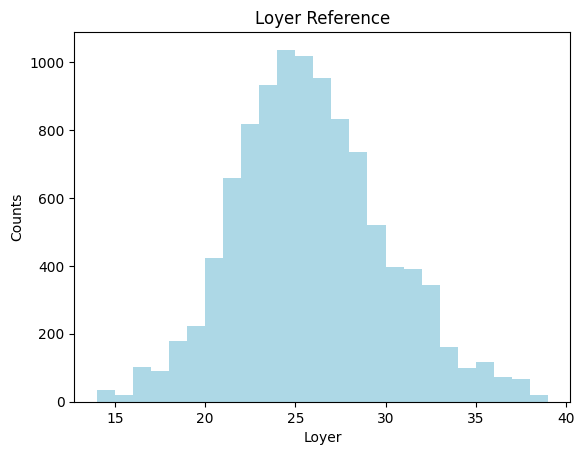

In [39]:
ax1 = data_union['Loy_Ref'].plot(kind='hist', bins=25, facecolor='lightblue')
ax1.set_title('Loyer Reference')
ax1.set_xlabel('Loyer')
ax1.set_ylabel('Counts')
plt.suptitle('')
plt.show()

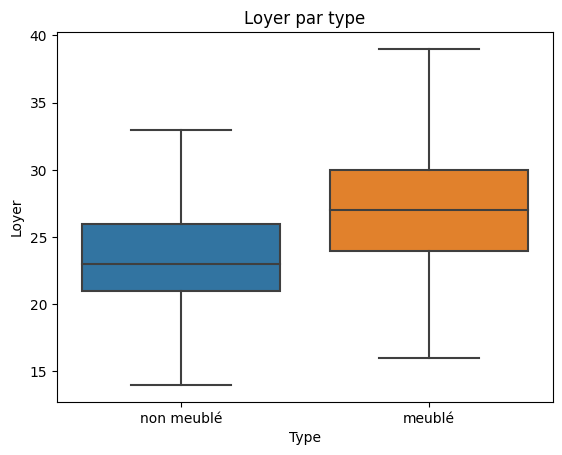

In [40]:
ax = sns.boxplot(x="Type", y="Loy_Ref",data=data_union, showfliers = False)
ax.set_title('Loyer par type')
ax.set_xlabel('Type')
ax.set_ylabel('Loyer')
plt.show()

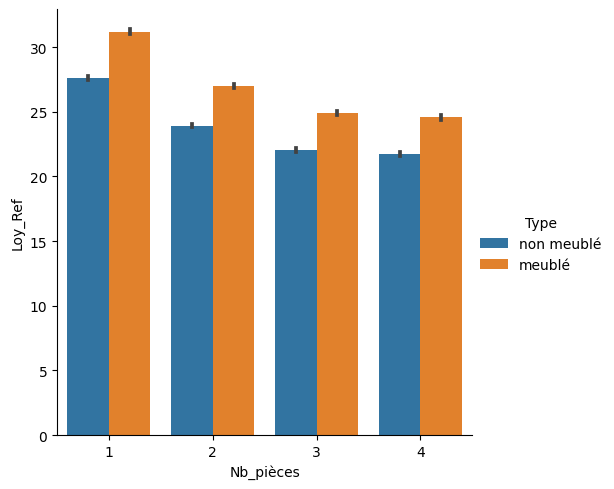

In [41]:
sns.catplot(data=data_union, kind="bar", x="Nb_pièces", y="Loy_Ref", hue="Type")

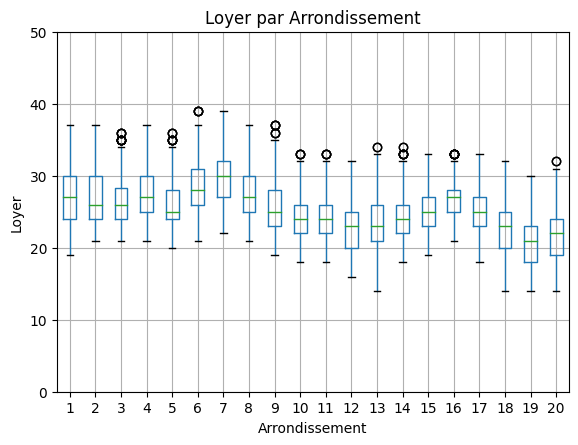

In [42]:
ax2 = data_union.boxplot(column=['Loy_Ref'], by=['Num_Arrond'])
ax2.set_title('Loyer par Arrondissement')
ax2.set_xlabel('Arrondissement')
ax2.set_ylabel('Loyer')
ax2.set_ylim(0,50)
plt.suptitle('')
plt.show()

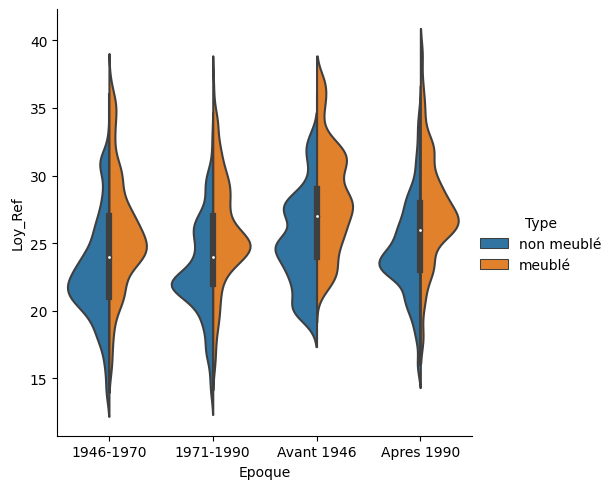

In [43]:
sns.catplot(data=data_union, kind="violin", x="Epoque", y="Loy_Ref", hue="Type", split=True)

<AxesSubplot: xlabel='Loy_Ref', ylabel='Count'>

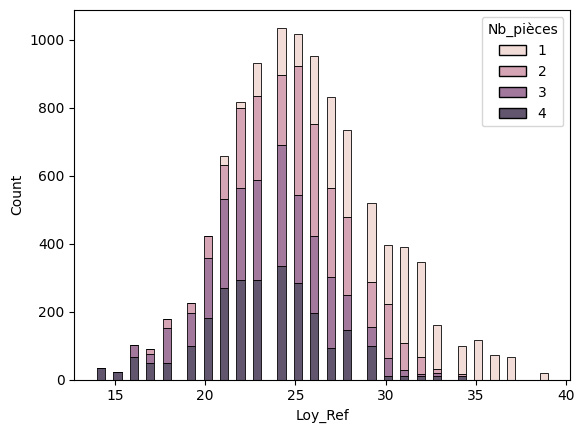

In [44]:
sns.histplot(data=data_union, x="Loy_Ref", hue="Nb_pièces", multiple="stack")